<a href="https://colab.research.google.com/github/Crispyhambun/File-System-Simulation/blob/main/incomeprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd


In [160]:
df = pd.read_csv('/content/sample_data/adult.csv') #import data
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [161]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [162]:
df.race.value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [163]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [164]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [165]:
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [166]:
#encoding

df = df.drop('education', axis=1)
df = pd.concat([df.drop('workclass', axis=1),pd.get_dummies(df.workclass).astype(int).add_prefix('workclass_')],axis =1)
df = pd.concat([df.drop('marital-status', axis=1),pd.get_dummies(df['marital-status']).astype(int).add_prefix('marital-status_')],axis =1)
df = pd.concat([df.drop('relationship', axis=1),pd.get_dummies(df.relationship).astype(int).add_prefix('relationship_')],axis =1)
df = pd.concat([df.drop('race', axis=1),pd.get_dummies(df.race).astype(int).add_prefix('race_')],axis =1)
df = pd.concat([df.drop('native-country', axis=1),pd.get_dummies(df['native-country']).astype(int).add_prefix('native-country_')],axis =1)
df = pd.concat([df.drop('occupation', axis=1),pd.get_dummies(df.occupation).astype(int).add_prefix('occupation_')],axis =1)


In [167]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x  =='>50K'  else 0)

In [169]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White', 'native-country_?', 'native-country_Cambodia',
       'native-country_Canada', 'native-c

In [170]:
df['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

<Axes: >

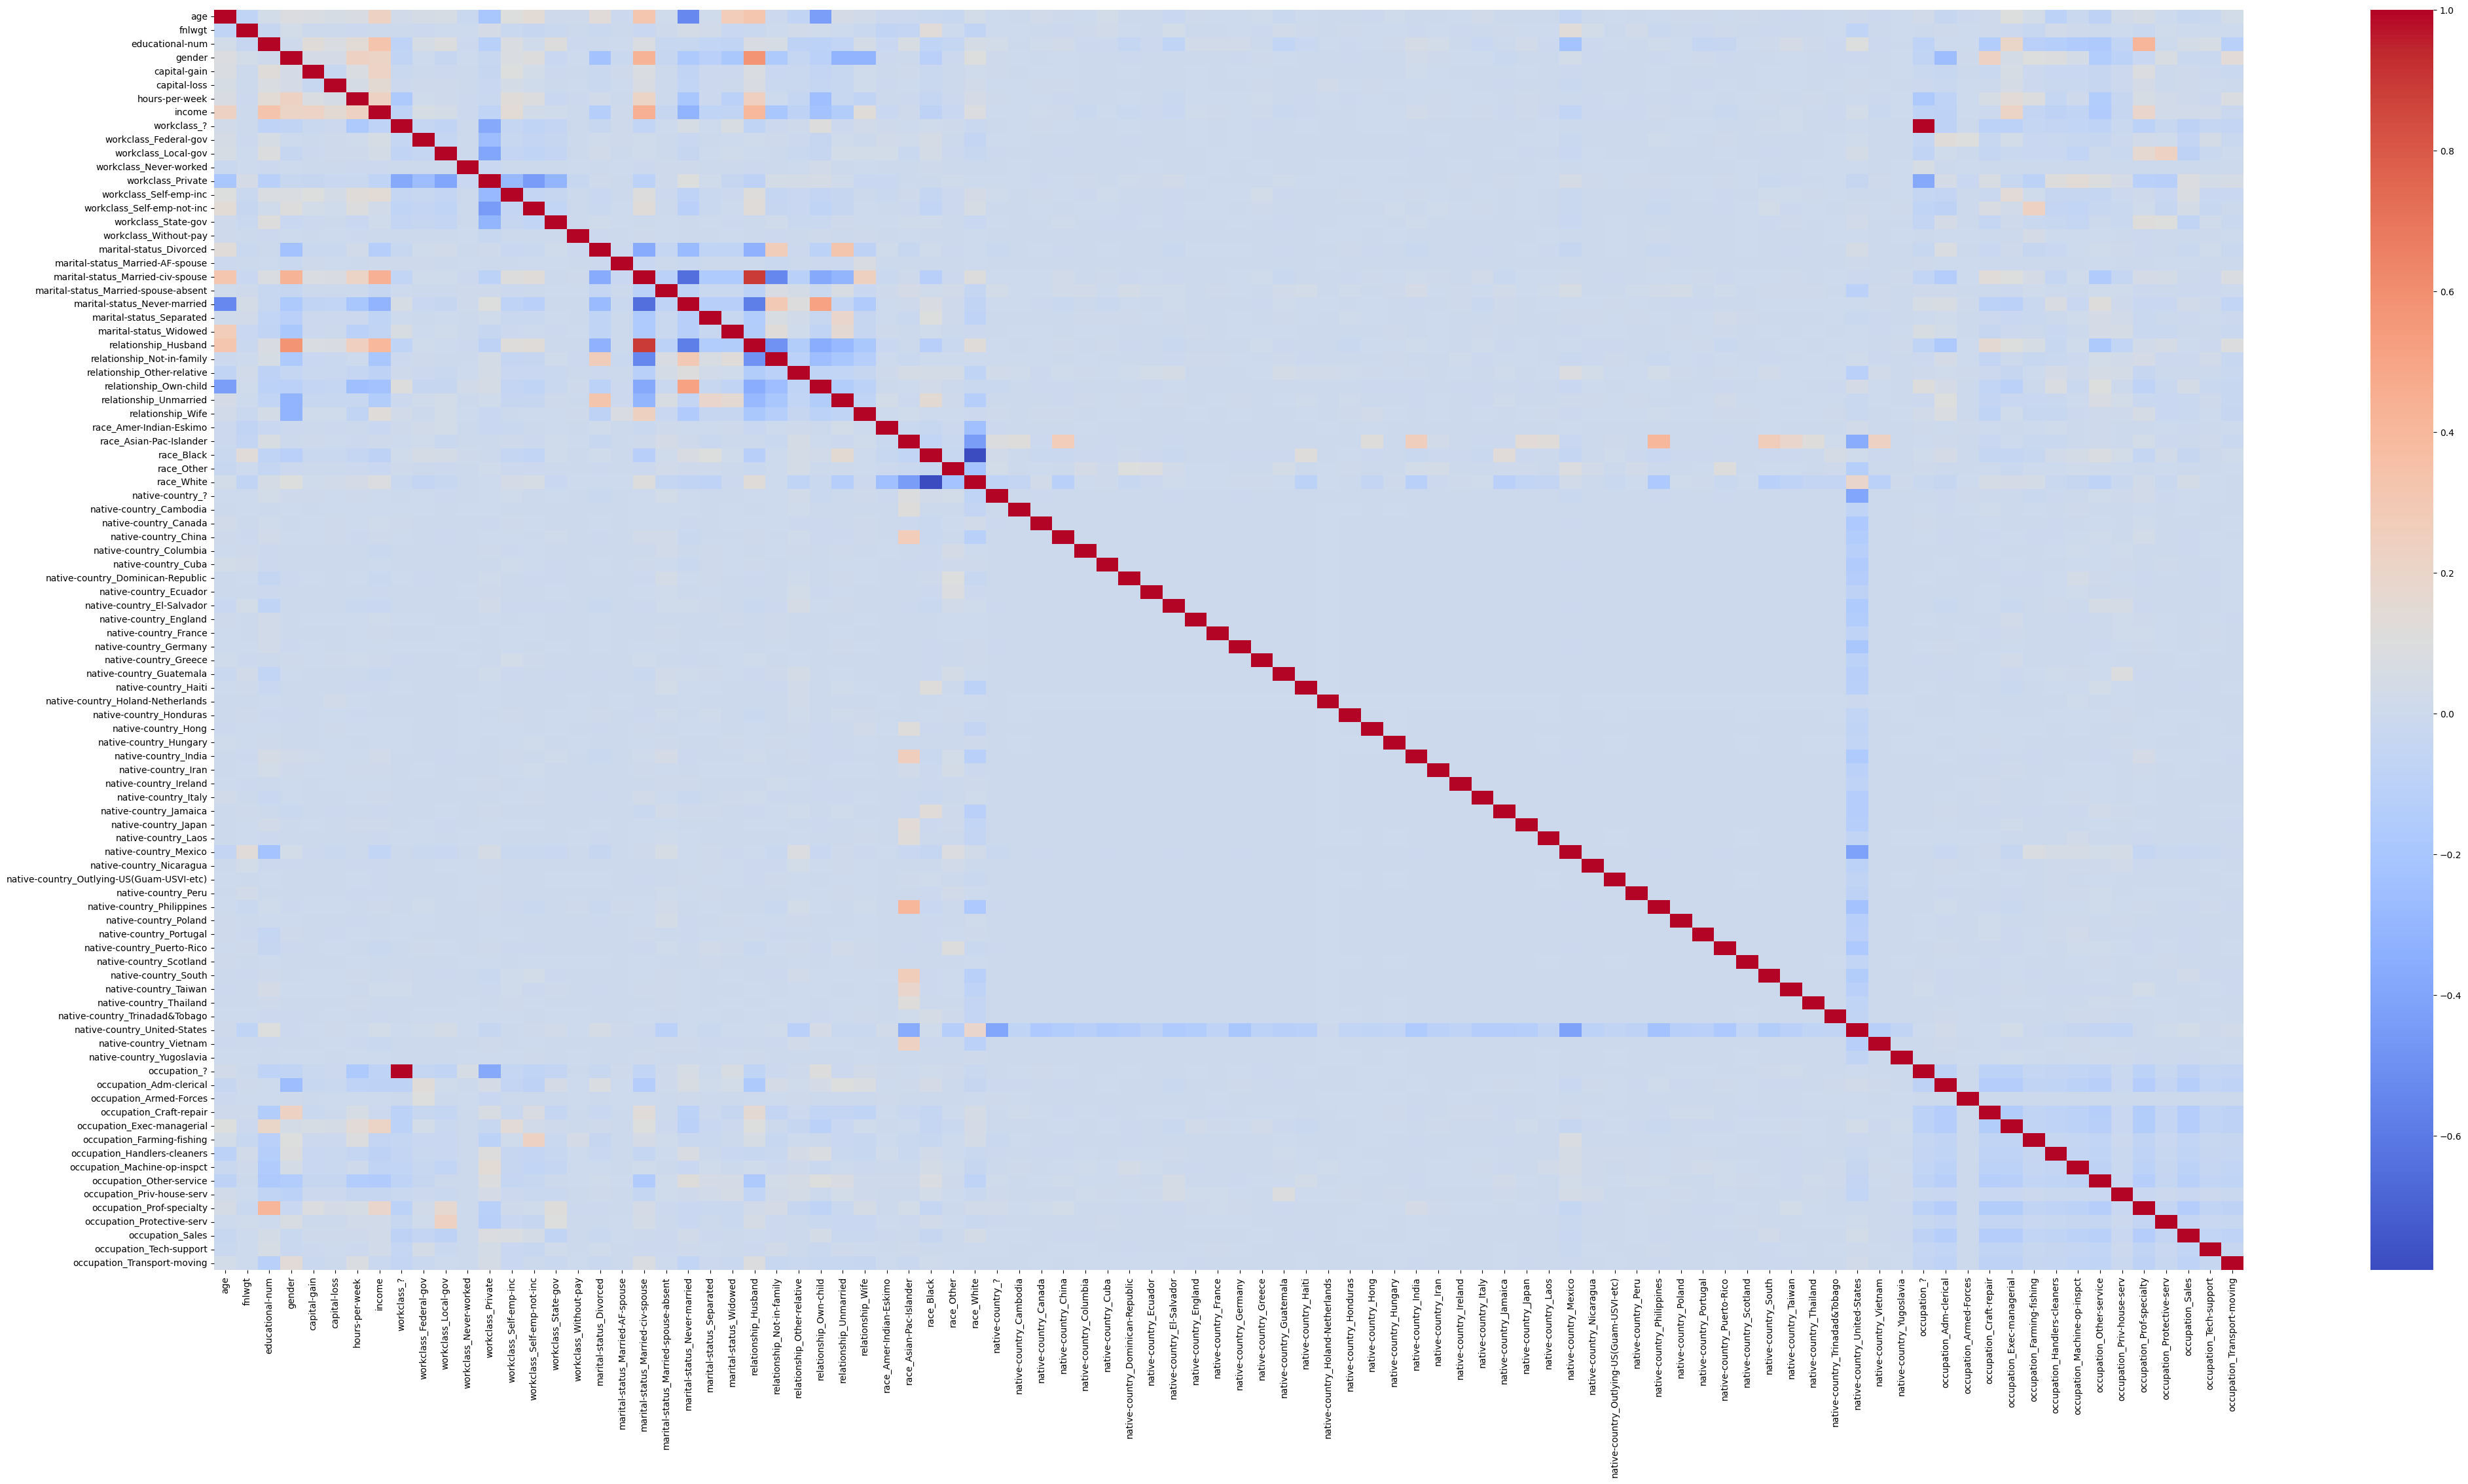

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (50,25))
sns.heatmap(df.corr(),annot = False,cmap= 'coolwarm')

In [172]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.026931,0.049867,...,0.034117,-0.091945,-0.016995,-0.086321,0.024485,0.053155,0.002673,-0.032101,-0.019027,0.032961
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005625,-0.009996,...,-0.028563,0.024692,0.008626,-0.005503,0.003220,-0.015155,0.016104,0.002764,0.001307,0.004021
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.079304,0.058072,...,-0.106429,-0.127695,-0.156943,-0.168937,-0.068833,0.417956,0.002622,0.035717,0.060942,-0.117282
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.064010,0.005861,...,0.100895,0.093415,0.035716,-0.153990,-0.091531,-0.025639,0.063143,-0.016825,-0.021201,0.132720
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019062,-0.003633,...,-0.008644,-0.022473,-0.026324,-0.038725,-0.008465,0.085070,-0.006962,0.008983,-0.009575,-0.019256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
occupation_Prof-specialty,0.053155,-0.015155,0.417956,-0.025639,0.085070,0.045043,0.057104,0.188793,-0.093772,0.026315,...,-0.067465,-0.080050,-0.097672,-0.127333,-0.026837,1.000000,-0.054506,-0.135537,-0.066430,-0.085601
occupation_Protective-serv,0.002673,0.016104,0.002622,0.063143,-0.006962,-0.000888,0.027377,0.024873,-0.035336,0.015711,...,-0.025423,-0.030165,-0.036806,-0.047983,-0.010113,-0.054506,1.000000,-0.051074,-0.025033,-0.032257
occupation_Sales,-0.032101,0.002764,0.035717,-0.016825,0.008983,0.008426,0.009401,0.023977,-0.087867,-0.055411,...,-0.063216,-0.075009,-0.091522,-0.119315,-0.025147,-0.135537,-0.051074,1.000000,-0.062247,-0.080211
occupation_Tech-support,-0.019027,0.001307,0.060942,-0.021201,-0.009575,0.004315,-0.009892,0.020951,-0.043066,0.038383,...,-0.030984,-0.036764,-0.044857,-0.058479,-0.012325,-0.066430,-0.025033,-0.062247,1.000000,-0.039314


In [173]:
coorelation = df.corr()['income'].abs()
sorted_correlation = coorelation.sort_values()
n_cols = int(0.8*len(df.columns)) #drop[ing bottom 80% loweest corr to visualize
cols_drop = sorted_correlation.iloc[:n_cols].index
df_dropped = df.drop(cols_drop,axis=1)

In [174]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty
0,25,7,1,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0
1,38,9,1,0,0,50,0,0,0,1,0,1,0,0,0,0,0,0,0
2,28,12,1,0,0,40,1,0,0,1,0,1,0,0,0,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,1,0,1,0,0,0,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,1,0,0,0,0,0,1,0,0,0
48838,40,9,1,0,0,40,1,0,0,1,0,1,0,0,0,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0
48840,22,9,1,0,0,20,0,0,0,0,1,0,0,1,0,0,0,0,0


<Axes: >

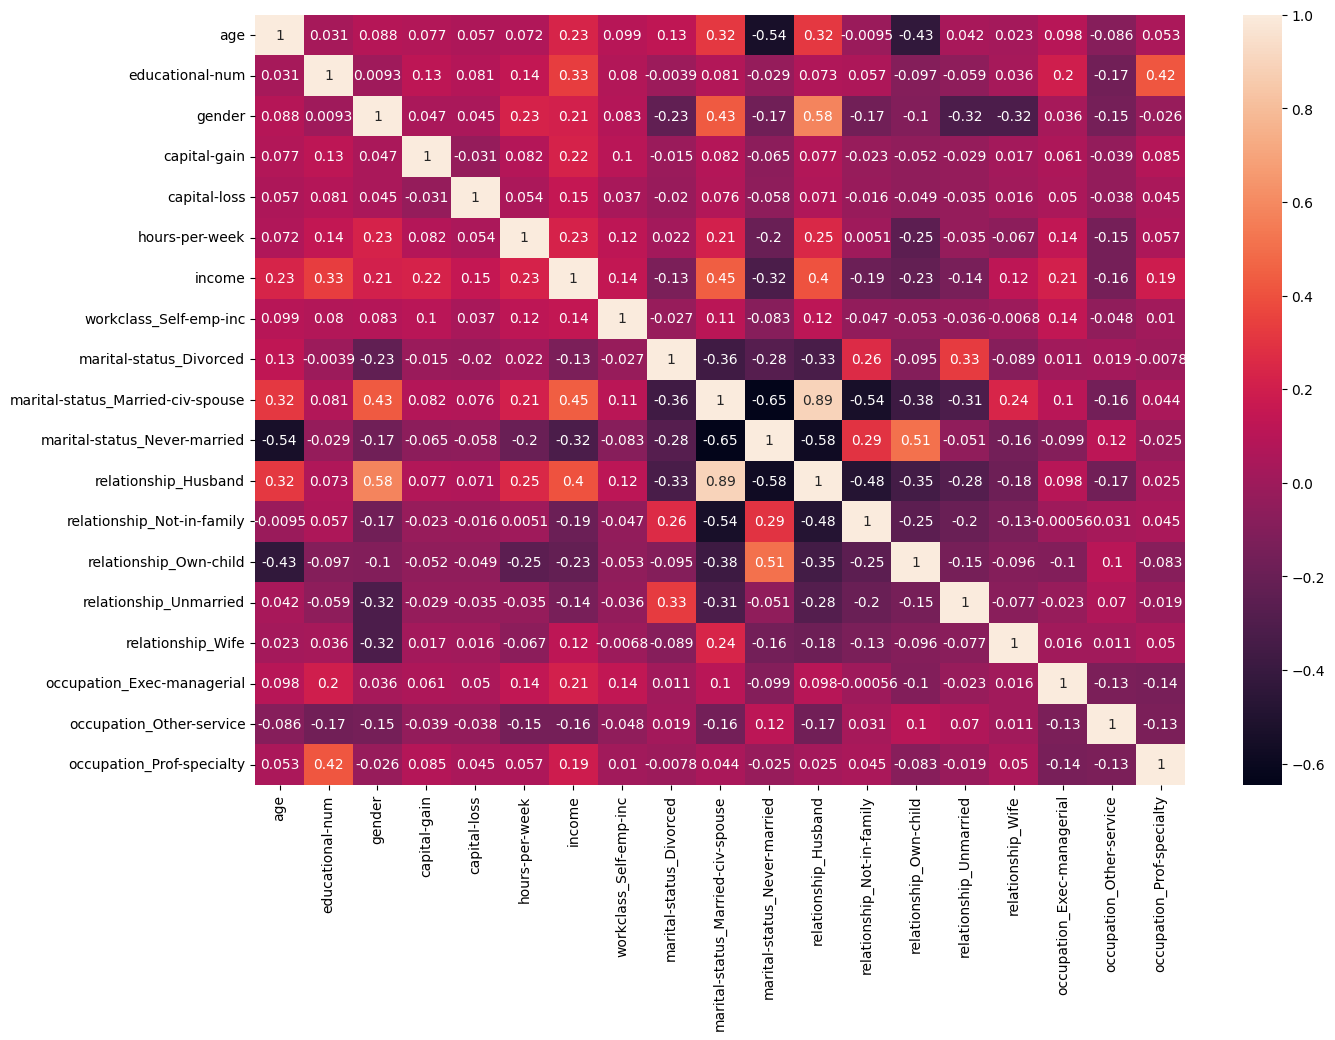

In [175]:
plt.figure(figsize = (15,10))
sns.heatmap(df_dropped.corr(),annot = True)

Using Random forest classifier to predict
why?? data nature is much descision like , yes/no format

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df ,test_df= train_test_split(df,test_size = 0.2)

In [177]:
train_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
48357,59,293971,10,1,0,0,40,1,0,1,...,0,0,0,0,0,0,0,0,1,0
38208,30,89625,10,0,0,0,5,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3854,44,227466,10,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10824,38,139473,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,37,117528,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29468,45,556652,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31195,34,287737,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28720,44,181762,10,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23519,29,183009,13,0,0,1590,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [178]:
test_df


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
17904,44,147206,10,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36645,51,384248,10,0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7411,21,116657,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3753,24,395297,10,0,0,0,30,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41999,53,131258,15,0,0,0,50,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,23,82067,10,1,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12227,49,36601,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6329,34,126853,14,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20739,26,213258,9,1,0,0,65,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [194]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.026931,0.049867,...,0.034117,-0.091945,-0.016995,-0.086321,0.024485,0.053155,0.002673,-0.032101,-0.019027,0.032961
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005625,-0.009996,...,-0.028563,0.024692,0.008626,-0.005503,0.003220,-0.015155,0.016104,0.002764,0.001307,0.004021
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.079304,0.058072,...,-0.106429,-0.127695,-0.156943,-0.168937,-0.068833,0.417956,0.002622,0.035717,0.060942,-0.117282
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.064010,0.005861,...,0.100895,0.093415,0.035716,-0.153990,-0.091531,-0.025639,0.063143,-0.016825,-0.021201,0.132720
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019062,-0.003633,...,-0.008644,-0.022473,-0.026324,-0.038725,-0.008465,0.085070,-0.006962,0.008983,-0.009575,-0.019256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
occupation_Prof-specialty,0.053155,-0.015155,0.417956,-0.025639,0.085070,0.045043,0.057104,0.188793,-0.093772,0.026315,...,-0.067465,-0.080050,-0.097672,-0.127333,-0.026837,1.000000,-0.054506,-0.135537,-0.066430,-0.085601
occupation_Protective-serv,0.002673,0.016104,0.002622,0.063143,-0.006962,-0.000888,0.027377,0.024873,-0.035336,0.015711,...,-0.025423,-0.030165,-0.036806,-0.047983,-0.010113,-0.054506,1.000000,-0.051074,-0.025033,-0.032257
occupation_Sales,-0.032101,0.002764,0.035717,-0.016825,0.008983,0.008426,0.009401,0.023977,-0.087867,-0.055411,...,-0.063216,-0.075009,-0.091522,-0.119315,-0.025147,-0.135537,-0.051074,1.000000,-0.062247,-0.080211
occupation_Tech-support,-0.019027,0.001307,0.060942,-0.021201,-0.009575,0.004315,-0.009892,0.020951,-0.043066,0.038383,...,-0.030984,-0.036764,-0.044857,-0.058479,-0.012325,-0.066430,-0.025033,-0.062247,1.000000,-0.039314


In [179]:
train_x = train_df.drop('income',axis = 1)
train_y = train_df['income']

test_x = test_df.drop('income',axis = 1)
test_y = test_df['income']


In [203]:
forest= RandomForestClassifier()
forest.fit(train_x,train_y)

RandomForestClassifier()

In [204]:
forest.score(test_x,test_y)

0.8582249974408844

In [182]:
imp = dict(zip(forest.feature_names_in_,forest.feature_importances_))
imp = {k: v for k,v in sorted(imp.items(),key= lambda x: x[1],reverse = True)}

In [ ]:
imp

In [193]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,250],
    'max_depth':[5,10,15,None],
    'min_samples_split':[2,4],
    'max_features':['sqrt','log2']

}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,verbose=10)
grid_search.fit(train_x,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.9s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.7s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.827 total time=   0.7s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.831 total time=   0.7s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [196]:
forest = grid_search.best_estimator_

In [200]:
forest.score(test_x,test_y)

0.8638550516941345